In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
X_train = pd.read_csv('agg_Xtrain_V2.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest_V2.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain_V2.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest_V2.csv').set_index('Unnamed: 0')

In [3]:
#hyperparameter tuning
Kcv = KFold(n_splits=10)
parameters = {'hidden_layer_sizes':[50,100,150],
              'alpha':[0.1,1],
              'learning_rate':['constant', 'adaptive'],
              'max_iter':[50,100,150]
}

mlp = MLPClassifier()
cv = GridSearchCV(mlp, param_grid=parameters, cv=Kcv)

In [4]:
%%time
#best params found by grid search
cv.fit(X_train,y_train)
cv.best_params_

CPU times: user 2h 18min 42s, sys: 17min 21s, total: 2h 36min 3s
Wall time: 2h 11min 15s


{'alpha': 0.1,
 'hidden_layer_sizes': 150,
 'learning_rate': 'constant',
 'max_iter': 150}

In [5]:
%%time
mlp.set_params(**cv.best_params_)
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.374473009722081, recall: 0.3255208333333333, f1score: 0.34257031380082276
CPU times: user 18.8 s, sys: 4.17 s, total: 23 s
Wall time: 8.92 s


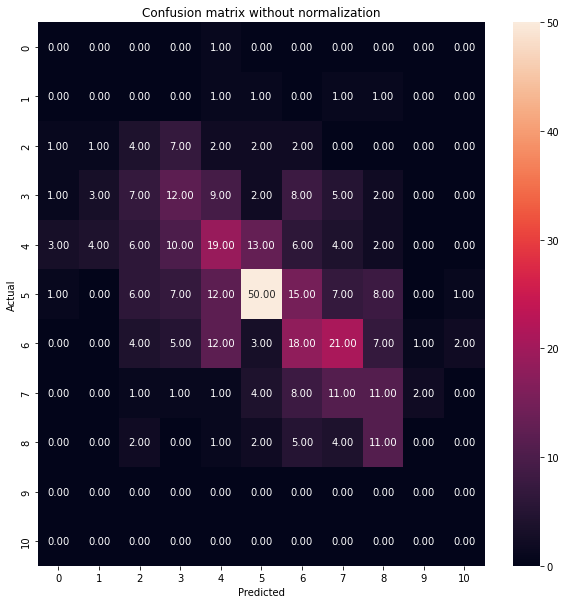

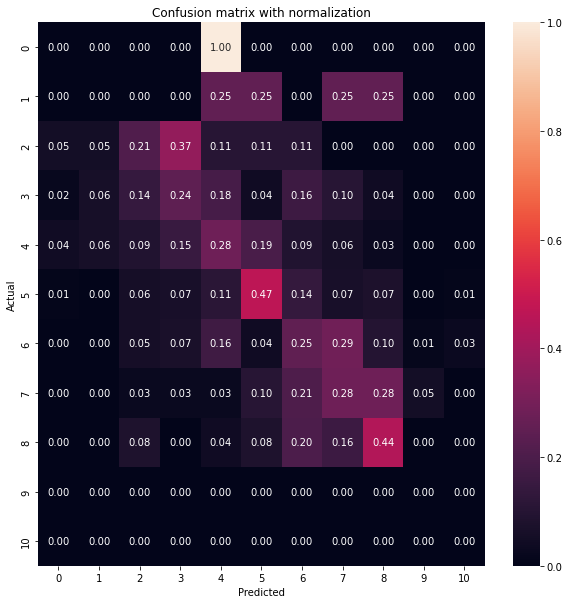

In [6]:
#plot result

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [7]:
print('training data')
print(classification_report(y_train, mlp.predict(X_train)))

print('test data')
print(classification_report(y_test, mlp.predict(X_test)))

training data
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       351
         1.0       0.96      1.00      0.98       351
         2.0       0.76      0.85      0.80       351
         3.0       0.69      0.65      0.67       351
         4.0       0.57      0.50      0.53       351
         5.0       0.59      0.53      0.56       351
         6.0       0.64      0.60      0.62       351
         7.0       0.67      0.70      0.69       351
         8.0       0.80      0.83      0.82       351
         9.0       0.97      1.00      0.98       351
        10.0       0.99      1.00      0.99       351

    accuracy                           0.79      3861
   macro avg       0.78      0.79      0.78      3861
weighted avg       0.78      0.79      0.78      3861

test data
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         4
